In [1]:
import torch
import cv2
import torchvision
import os
import shutil
import matplotlib.pyplot as plt

from torchvision import transforms
from torch import nn
import torch.optim as optim
import torchvision.models as models
import numpy as np
from torch.utils.tensorboard import SummaryWriter
from torch.optim.lr_scheduler import StepLR, CosineAnnealingLR, ReduceLROnPlateau

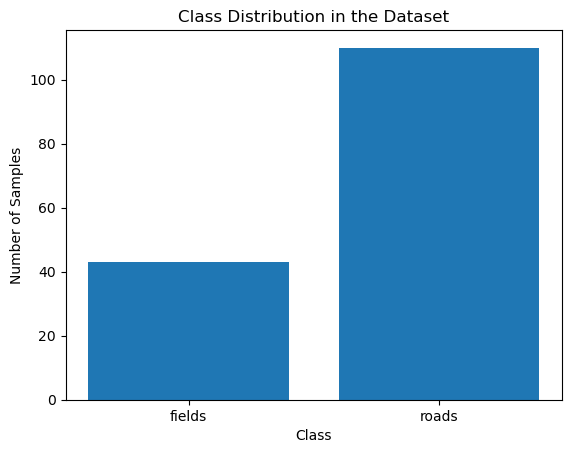

In [2]:
# Setup directory paths to train and test images
train_dir = "C:/Users/gmkko/Documents/dataset/train_images/"
test_dir = "C:/Users/gmkko/Documents/dataset/test_images/"

# Create a dataset using ImageFolder
dataset = torchvision.datasets.ImageFolder(root=train_dir)

# Get class names and counts
class_names = dataset.classes
class_counts = [0] * len(class_names)

# Count the number of samples in each class
for _, label in dataset:
    class_counts[label] += 1

# Plot the histogram
plt.bar(class_names, class_counts)
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Class Distribution in the Dataset')
plt.show()

### Create datasets and DataLoader

In [3]:
from Data_utils import count_images_in_directory, create_class_weights, create_data_loaders
from model import ResNet18WithDropout, create_model
from train_utils import train, evaluate_test
import torch.nn as nn
import torch.optim as optim
import os
from torchvision import datasets, transforms
import torch
import torchvision
import torch.nn as nn
from torchvision import models
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import torch, torchvision
import matplotlib.pyplot as plt
import numpy as np

c:\Users\gmkko\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\gmkko\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


epoch number 1
   - Training dataset got 69 out of 153 images correctly (45.098%). Epoch Loss: 1.306
   - Test dataset accuracy: 40.000%
   - Precision: 16.000%, Recall: 40.000%, F1 Score: 22.857%
epoch number 2


c:\Users\gmkko\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


   - Training dataset got 113 out of 153 images correctly (73.856%). Epoch Loss: 0.842
   - Test dataset accuracy: 70.000%
   - Precision: 69.524%, Recall: 70.000%, F1 Score: 69.011%
epoch number 3
   - Training dataset got 110 out of 153 images correctly (71.895%). Epoch Loss: 0.589
   - Test dataset accuracy: 40.000%
   - Precision: 16.000%, Recall: 40.000%, F1 Score: 22.857%
epoch number 4


c:\Users\gmkko\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


   - Training dataset got 115 out of 153 images correctly (75.163%). Epoch Loss: 0.701
   - Test dataset accuracy: 80.000%
   - Precision: 85.000%, Recall: 80.000%, F1 Score: 78.095%
epoch number 5
   - Training dataset got 120 out of 153 images correctly (78.431%). Epoch Loss: 0.512
   - Test dataset accuracy: 60.000%
   - Precision: 36.000%, Recall: 60.000%, F1 Score: 45.000%
epoch number 6


c:\Users\gmkko\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


   - Training dataset got 132 out of 153 images correctly (86.275%). Epoch Loss: 0.447
   - Test dataset accuracy: 60.000%
   - Precision: 36.000%, Recall: 60.000%, F1 Score: 45.000%
epoch number 7


c:\Users\gmkko\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


   - Training dataset got 128 out of 153 images correctly (83.660%). Epoch Loss: 0.448
   - Test dataset accuracy: 60.000%
   - Precision: 36.000%, Recall: 60.000%, F1 Score: 45.000%
epoch number 8


c:\Users\gmkko\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


   - Training dataset got 123 out of 153 images correctly (80.392%). Epoch Loss: 0.489
   - Test dataset accuracy: 80.000%
   - Precision: 80.000%, Recall: 80.000%, F1 Score: 80.000%
epoch number 9
   - Training dataset got 132 out of 153 images correctly (86.275%). Epoch Loss: 0.465
   - Test dataset accuracy: 60.000%
   - Precision: 57.500%, Recall: 60.000%, F1 Score: 56.190%
epoch number 10
   - Training dataset got 142 out of 153 images correctly (92.810%). Epoch Loss: 0.307
   - Test dataset accuracy: 70.000%
   - Precision: 69.524%, Recall: 70.000%, F1 Score: 69.011%
epoch number 11
   - Training dataset got 133 out of 153 images correctly (86.928%). Epoch Loss: 0.407
   - Test dataset accuracy: 80.000%
   - Precision: 80.000%, Recall: 80.000%, F1 Score: 80.000%
epoch number 12
   - Training dataset got 139 out of 153 images correctly (90.850%). Epoch Loss: 0.413
   - Test dataset accuracy: 80.000%
   - Precision: 80.000%, Recall: 80.000%, F1 Score: 80.000%
epoch number 13
   - T

c:\Users\gmkko\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


   - Training dataset got 130 out of 153 images correctly (84.967%). Epoch Loss: 0.403
   - Test dataset accuracy: 60.000%
   - Precision: 36.000%, Recall: 60.000%, F1 Score: 45.000%
epoch number 20


c:\Users\gmkko\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


   - Training dataset got 141 out of 153 images correctly (92.157%). Epoch Loss: 0.286
   - Test dataset accuracy: 60.000%
   - Precision: 36.000%, Recall: 60.000%, F1 Score: 45.000%
epoch number 21


c:\Users\gmkko\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


   - Training dataset got 138 out of 153 images correctly (90.196%). Epoch Loss: 0.278
   - Test dataset accuracy: 70.000%
   - Precision: 80.000%, Recall: 70.000%, F1 Score: 64.000%
epoch number 22
   - Training dataset got 140 out of 153 images correctly (91.503%). Epoch Loss: 0.227
   - Test dataset accuracy: 60.000%
   - Precision: 36.000%, Recall: 60.000%, F1 Score: 45.000%
Epoch 00022: reducing learning rate of group 0 to 7.5000e-04.
epoch number 23


c:\Users\gmkko\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


   - Training dataset got 139 out of 153 images correctly (90.850%). Epoch Loss: 0.312
   - Test dataset accuracy: 70.000%
   - Precision: 69.524%, Recall: 70.000%, F1 Score: 69.011%
   - Best f1_sccore: 90.101%
training complete


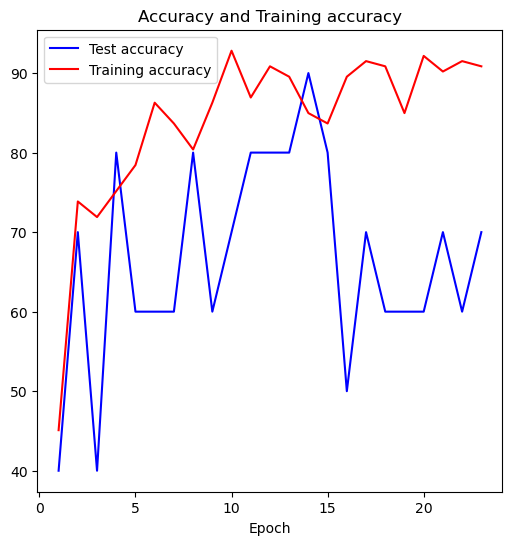

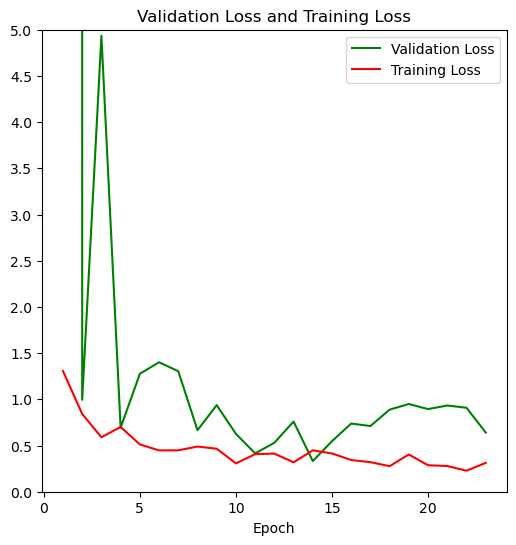

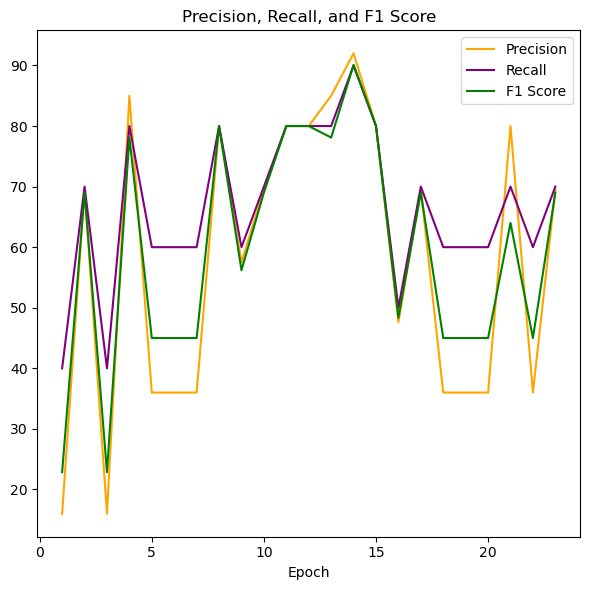

In [4]:

# Set directory paths
train_dir = "C:/Users/gmkko/Documents/dataset/train_images/"
test_dir = "C:/Users/gmkko/Documents/dataset/test_images/"

# Set classes paths
fields_path = "C:/Users/gmkko/Documents/dataset/train_images/fields"
roads_path = "C:/Users/gmkko/Documents/dataset/train_images/roads"

num_classes = 2
model = create_model()
class_weights = create_class_weights(fields_path, roads_path)

# Define your transformations and create data loaders
train_dataloader,test_dataloader  = create_data_loaders(train_dir, test_dir, batch_size=32)


# Define your loss function and optimizer
loss_fn = nn.CrossEntropyLoss(weight=class_weights)
optimizer = optim.Adam(model.parameters(), lr=0.003, betas=(0.9, 0.99), weight_decay=0.001)
#scheduler = optim.ReduceLROnPlateau(optimizer, mode='min', patience=3, factor=0.5, verbose=True)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=3, factor=0.5, verbose=True)
# Train your model
trained_model = train(model, train_dataloader, test_dataloader, loss_fn, optimizer,scheduler,23)

### Test function example

In [7]:
from PIL import Image
def inference_single(model_path, image_path, class_names):
    model = create_model()
    model.load_state_dict(torch.load(model_path))
    model.eval()
    image_transforms = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor()
    ])

    img = Image.open(image_path)
    img = image_transforms(img).float()
    img = img.unsqueeze(0)

    output = model(img)
    _, predicted = torch.max(output.data, 1)
    
    predicted_class = class_names[predicted.item()]
    print(f"Predicted class: {predicted_class}")
    
def inference(model_path, test_path, class_names):
    class_names = ["fields", "roads"]
    for dir in os.listdir(test_path):
        directory = os.path.join(test_path, dir)
        for file in os.listdir(directory):
            image_path = os.path.join(directory, file)
            print(image_path)
            inference_single(model_path, image_path, class_names)

In [9]:
test_dir = "C:/Users/gmkko/Documents/dataset/test/"
inference("best_checkpoint.pth", test_dir, class_names=["fields", "roads"])

C:/Users/gmkko/Documents/dataset/test/fields\1.jpeg
Predicted class: fields
C:/Users/gmkko/Documents/dataset/test/fields\10.jpeg
Predicted class: fields
C:/Users/gmkko/Documents/dataset/test/fields\4.jpeg
Predicted class: fields
C:/Users/gmkko/Documents/dataset/test/fields\9.jpeg
Predicted class: fields
C:/Users/gmkko/Documents/dataset/test/roads\2.jpeg
Predicted class: roads
C:/Users/gmkko/Documents/dataset/test/roads\3.jpeg
Predicted class: roads
C:/Users/gmkko/Documents/dataset/test/roads\5.jpeg
Predicted class: roads
C:/Users/gmkko/Documents/dataset/test/roads\6.jpeg
Predicted class: roads
C:/Users/gmkko/Documents/dataset/test/roads\7.jpeg
Predicted class: fields
C:/Users/gmkko/Documents/dataset/test/roads\8.jpeg
Predicted class: roads
